# EfficientNetB0

In [8]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
import os


c:\Users\molim\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [9]:

# ✅ Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🚀 Using device: {device}")


🚀 Using device: cuda


In [10]:

# 🔁 Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


In [11]:

# 🧠 Dataset loading
train_dir = "data/train"
val_dir = "data/val"


In [12]:

train_data = datasets.ImageFolder(train_dir, transform=transform)
val_data = datasets.ImageFolder(val_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)


In [13]:

# 🧬 Model: EfficientNet
model = models.efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(train_data.classes))
model = model.to(device)


c:\Users\molim\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\molim\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\molim/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:06<00:00, 3.53MB/s]


In [14]:

# 🎯 Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [16]:
from tqdm import tqdm

num_epochs = 10
train_losses, val_losses = [], []

print(f"🧠 Starting training on {device} for {num_epochs} epochs...")

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    print(f"\n📦 Epoch {epoch+1}/{num_epochs}")
    train_bar = tqdm(train_loader, desc='🔁 Training', leave=False)
    
    for inputs, labels in train_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_bar.set_postfix(loss=loss.item())

    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # 🔍 Validation loop
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0

    val_bar = tqdm(val_loader, desc='🧪 Validating', leave=False)
    with torch.no_grad():
        for val_inputs, val_labels in val_bar:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            outputs = model(val_inputs)
            loss = criterion(outputs, val_labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += val_labels.size(0)
            correct += (predicted == val_labels).sum().item()

            val_bar.set_postfix(loss=loss.item())

    epoch_val_loss = val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    accuracy = 100 * correct / total

    print(f"✅ Epoch {epoch+1} | Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f} | Accuracy: {accuracy:.2f}%")


🧠 Starting training on cuda for 10 epochs...

📦 Epoch 1/10


✅ Epoch 1 | Train Loss: 0.1441 | Val Loss: 0.0496 | Accuracy: 98.33%

📦 Epoch 2/10


✅ Epoch 2 | Train Loss: 0.0615 | Val Loss: 0.0257 | Accuracy: 99.09%

📦 Epoch 3/10


✅ Epoch 3 | Train Loss: 0.0361 | Val Loss: 0.0212 | Accuracy: 99.27%

📦 Epoch 4/10


✅ Epoch 4 | Train Loss: 0.0274 | Val Loss: 0.0214 | Accuracy: 99.34%

📦 Epoch 5/10


✅ Epoch 5 | Train Loss: 0.0242 | Val Loss: 0.0208 | Accuracy: 99.30%

📦 Epoch 6/10


✅ Epoch 6 | Train Loss: 0.0206 | Val Loss: 0.0070 | Accuracy: 99.84%

📦 Epoch 7/10


✅ Epoch 7 | Train Loss: 0.0161 | Val Loss: 0.0055 | Accuracy: 99.89%

📦 Epoch 8/10


✅ Epoch 8 | Train Loss: 0.0151 | Val Loss: 0.0137 | Accuracy: 99.47%

📦 Epoch 9/10


✅ Epoch 9 | Train Loss: 0.0124 | Val Loss: 0.0017 | Accuracy: 99.98%

📦 Epoch 10/10


✅ Epoch 10 | Train Loss: 0.0103 | Val Loss: 0.0066 | Accuracy: 99.78%


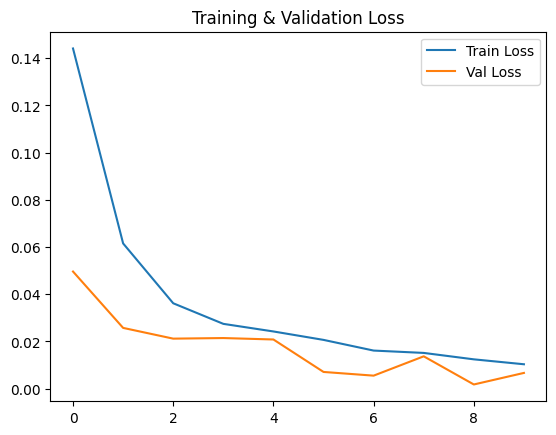

In [17]:

# 📊 Plot Loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.show()


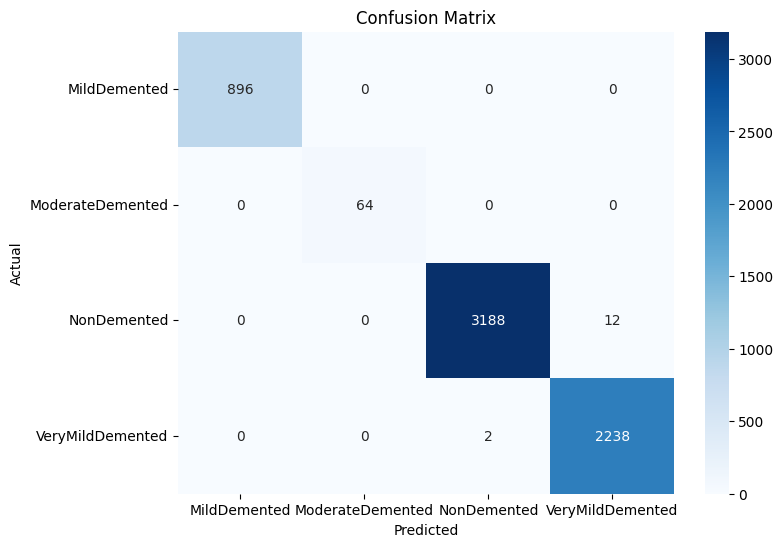


📋 Classification Report:

                  precision    recall  f1-score   support

    MildDemented       1.00      1.00      1.00       896
ModerateDemented       1.00      1.00      1.00        64
     NonDemented       1.00      1.00      1.00      3200
VeryMildDemented       0.99      1.00      1.00      2240

        accuracy                           1.00      6400
       macro avg       1.00      1.00      1.00      6400
    weighted avg       1.00      1.00      1.00      6400



In [18]:

# 📉 Confusion Matrix
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_inputs = val_inputs.to(device)
        outputs = model(val_inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(val_labels.numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=train_data.classes, yticklabels=train_data.classes, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n📋 Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=train_data.classes))


In [19]:

# 🔍 Single Image Prediction
def predict_image(image_path):
    model.eval()
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        probs = torch.nn.functional.softmax(output[0], dim=0)
        pred_index = torch.argmax(probs).item()
        pred_class = train_data.classes[pred_index]
        confidence = probs[pred_index].item() * 100

    print(f"\n🖼️ Predicted Class: {pred_class} ({confidence:.2f}%)")
    return pred_class, confidence


In [21]:

# Example usage:
predict_image("data/val/MildDemented/26 (19).jpg")



🖼️ Predicted Class: MildDemented (99.99%)


('MildDemented', 99.99343156814575)

In [22]:
# Save only the model parameters (recommended for portability)
torch.save(model.state_dict(), "efficientnet_brain_tumor.pth")
print("✅ Model weights saved to efficientnet_brain_tumor.pth")


✅ Model weights saved to efficientnet_brain_tumor.pth


In [24]:
# Save the whole model (not recommended across different environments)
torch.save(model, "efficientnet_full_model.pth")
print("✅ Full model saved to efficientnet_full_model.pth")


✅ Full model saved to efficientnet_full_model.pth
